# IBTrACS

In [6]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [8]:
import xarray as xr
from sithom.plot import plot_defaults
from sithom.xr import plot_units
from src.constants import IBTRACS_NC
plot_defaults()

In [2]:
ds = xr.open_dataset(IBTRACS_NC)

In [3]:
ds.storm.shape[0]

13612

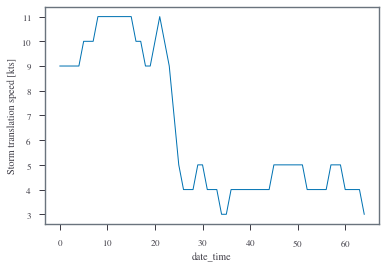

In [4]:
ds.storm_speed.isel(storm=0).plot()

'filter_function'  0.71352 s 

'plot_all_storms'  33.07146 s 

'plot_na_tcs'  39.76552 s 



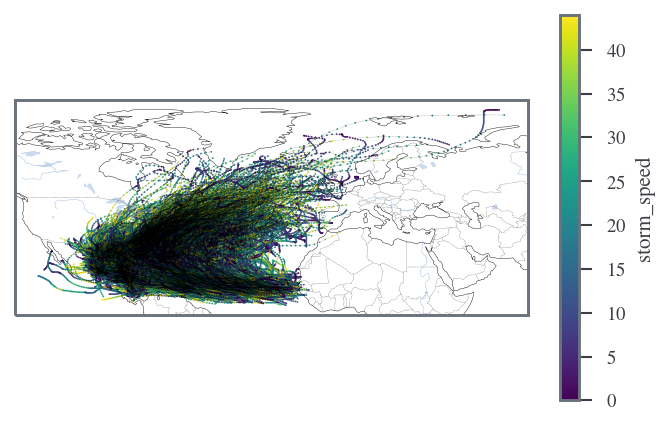

In [13]:
from src.plot.ibtracs import plot_na_tcs
plot_na_tcs()

In [ ]:
na = np.array([2, 1, 0])
ta = np.array([False, True, False])
na[ta]

In [ ]:
new_ds = filter_function(ds)
new_ds

In [ ]:
ds["basin"].isel(storm=slice(10,20)) == b"NA"

In [ ]:
ds["basin"]

In [ ]:
for i in ds.storm:
    print(ds.sel(storm=i).name.values)

In [ ]:
ds.basin.plot()

In [ ]:
plot_units(ds)

ds.swh.sel(time="2005-08-2T01:00:00").plot()
ds.tp.sel(time="2005-08-2T01:00:00").plot()